In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_probability as tfp
tfd = tfp.distributions
tfb = tfp.bijectors
tfpl = tfp.layers

# Bijectors and normalising flows

 ## Coding tutorials
 #### [1. Bijectors](#coding_tutorial_1)
 #### [2. The TransformedDistribution class](#coding_tutorial_2)
 #### [3. Subclassing bijectors](#coding_tutorial_3)
 #### [4. Normalising flows](#coding_tutorial_4)

***
<a id="coding_tutorial_1"></a>
## Bijectors

Son objetos en TensorFlow Probability que aplican funciones biyectivas(invertibles) a tensores, estos objetos forman la base que necesitamos para los modelos de flujo normalizador.

Como los biyectores representan funciones invertibles $f(x)$, las funciones invertibles pueden componerse y dar una nueva funcion invertible $f(g(x))$ por ende podemos componer biyectores  a traves de un metodo isponible del objeto

In [2]:
#importamos tensorflow probability
import tensorflow_probability as tfp

#hacemos un alias para los biyectores dentro de tfp
tfb=tfp.bijectors

#los biyectores transforman tensores 

#creemos un tensor constante
z=tf.constant([1.,2.,3.])
print(z)
print()

#hagamos una instancia del biyector que escala tfb.Scale(n) donde n es el factor de escala
scale=tfb.Scale(2.)

#para ser aplicados biyectores tienen metodos .foward(x) aplica el biyector a x .inverse(x) aplica el inverso del 
#proyector a x

x=scale.forward(z)
#se multiplica cada elemento por 2
print(x)
print()

#aplica la inversa dividiendo entre 2
y=scale.inverse(x)
print(y)
print()

#si le aplicamos inveza a cualquier tensor lo divide entre 2
print(scale.inverse(z))

tf.Tensor([1. 2. 3.], shape=(3,), dtype=float32)

tf.Tensor([2. 4. 6.], shape=(3,), dtype=float32)

tf.Tensor([1. 2. 3.], shape=(3,), dtype=float32)

tf.Tensor([0.5 1.  1.5], shape=(3,), dtype=float32)


In [3]:
#compongamos dos biyectores 

#definiendo un biyector que escale por 2
scale=tfb.Scale(2)

#definamos un biyector que traslade por 1
shift=tfb.Shift(1)

#hacendo la composicion mediante el metodo .Chain([biyector1,biyector2,...,biyectorn])
#ahora tenemos un biyector que aplica los biyectores en el orden inverso en el que pasamos la lista es decir
#aplica la lista del ultimo al primero:
#.Chain([biyector1,biyector2,...,biyectorn])= biyector1(...biyectorn-1(biyectorn(x)))
scale_and_shift=tfb.Chain([scale,shift])

#como es biyector podemos aplicar forward e inverse:

#creemos un tensor constante
z=tf.constant([1.,2.,3.])
print(z)
print()

#apliquemos biyector compuesto note que la funcion resultante es f(x)=2(x+1) 
x=scale_and_shift.forward(z)
print(x)
print()

#apliquemos la inversa
y=scale_and_shift.inverse(x)
print(y)
print()

#podemos componer biyectores sin usar el metodo Chain simplemente pasando un biyector como parametro de otro
# asi equivalentemente tenemos
scale_and_shift=scale(shift)
print(scale_and_shift)
print()

#tampoco es ncesario usar el metodo forward para ejecutar biyector en tensor podemos simplemenye pasarlo como
#parametro
print(scale_and_shift(z))
print()

tf.Tensor([1. 2. 3.], shape=(3,), dtype=float32)

tf.Tensor([4. 6. 8.], shape=(3,), dtype=float32)

tf.Tensor([1. 2. 3.], shape=(3,), dtype=float32)


tf.Tensor([4. 6. 8.], shape=(3,), dtype=float32)



In [4]:
#tambien podemos pasarle a los biyectores  distribuciones de tfp.distributions

#definamos una distribucion normal base
normal=tfd.Normal(loc=0.,scale=1.)

#tomemos una muestra
z=normal.sample(3)
print(z)
print()

#construimos un biyector compuesto 
scale_and_shift=tfb.Chain([tfb.Scale(2),tfb.Shift(1)])

#ahora podemos evaluar la muestra en el biyector
x=scale_and_shift(z)
print(x)
print()

#z es una realizacion de una variable aleatoria por ende tiene asociada una log_prob
log_prob_z=normal.log_prob(z)
print(log_prob_z)
print()

#pero x tambien es una realizacion de una variable aleatoria que corresponde a la distribucion transformada genrda
#por el biyector y nos gustaria evaluar la densidad de esta distribucion transformada en x
#esto es lo que nos permite hacer la formula de cambio de variable (ve el notebook de este tema)
log_prob_x=normal.log_prob(z)-scale_and_shift.forward_log_det_jacobian(z,event_ndims=0)

#forward_log_det_jacobian(z,event_ndims=0) calcula el logaritmo del determinante del jacobiano de la distribucion
#como parametro recibe la realizacion de la distribucion y el numero de dimensiones del event espace presentes 
#en el tensor z recuerda que z esta determinado por la forma (num_muestras,lote,event shape), el calculo del
#jacobiano se debe reducir sobre la dimension del event shape

#como podemos hacer el mismo proceso usando la funcion inversa tambien tenemos 
#inverse_log_det_jacobian(z,event_ndims=0) que juega el mismo papel pero para el inverso de la funcion 

tf.Tensor([ 0.07196625 -1.2092618   0.01214774], shape=(3,), dtype=float32)

tf.Tensor([ 2.1439326  -0.41852355  2.0242956 ], shape=(3,), dtype=float32)

tf.Tensor([-0.9215281 -1.6500955 -0.9190123], shape=(3,), dtype=float32)



In [67]:
# Define base distribution
normal=tfd.Normal(loc=0,scale=1)


In [68]:
# Sample from base distribution
n=10000
z=normal.sample(n)

### Scale and shift bijector

In [69]:
# Define scale and shift
factor_scale=4.5
factor_shift=7
scale=tfb.Scale(factor_scale)
shift=tfb.Shift(factor_shift)

In [70]:
# Define chain bijector
scale_and_shift=tfb.Chain([shift,scale])

In [71]:
# We can also use call methods
scale_and_shift=shift(scale)

In [72]:
# Apply the forward transformation
x=scale_and_shift.forward(z)

In [73]:
# Check the forward transformation
#si la norma es 0 los dos son iguales
tf.norm(x-(z*factor_scale+factor_shift))

<tf.Tensor: shape=(), dtype=float32, numpy=0.0>

#### Plots

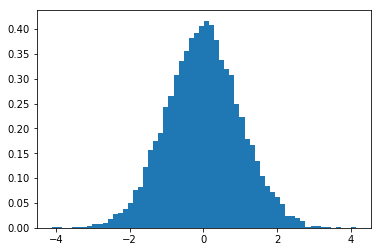

In [74]:
# Plot z density
plt.hist(z,bins=60,density=True)
plt.show()
#normal con media en 0 ie centrada en cero y con desviacion 1

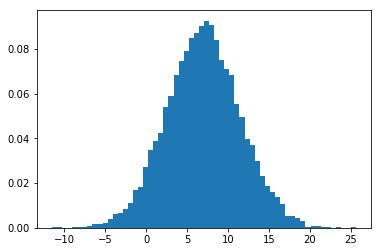

In [75]:
# Plot x density

plt.hist(x,bins=60,density=True)
plt.show()
#normal centrada en 7 pues la trans de 0 es 4.5(0)+7=7

#### Inverse transformation

In [76]:
# Apply inverse transformation
inv_x=scale_and_shift.inverse(x)

In [77]:
# Check inverse transformation
#veamos que regresa z si la norma de la resta es 0 son iguales
tf.norm(inv_x-z)

<tf.Tensor: shape=(), dtype=float32, numpy=0.0>

#### Log probability

In [78]:
# Compute log prob for x
log_prob_x=normal.log_prob(z)-scale_and_shift.forward_log_det_jacobian(z,event_ndims=0)
print(log_prob_x)

tf.Tensor([-2.4550898 -2.554236  -2.542855  ... -2.4234145 -2.4282205 -2.4425213], shape=(10000,), dtype=float32)


In [79]:
# We can also use the inverse transformation
log_prob_x=(normal.log_prob(scale_and_shift.inverse(x))+scale_and_shift.inverse_log_det_jacobian(x,event_ndims=0))
print(log_prob_x)

#note que el resultado anterior y este son el mismo uno usando la funcion y el z y la otra usando la inversa y x

tf.Tensor([-2.4550898 -2.554236  -2.542855  ... -2.4234145 -2.4282205 -2.4425213], shape=(10000,), dtype=float32)


### Broadcasting

In [149]:
##### Softfloor bijector
#aplica f que aproxima a funcion piso pero diferenciable hacepta parametro t(temperatura)
#si t va a infinito se comporta como la identidad
#si t cerca de 0 se aproxima a funcion piso
#softfloor(x, t) = a * sigmoid((x - 1.) / t) + b
#a = 1 / (sigmoid(0.5 / t) - sigmoid(-0.5 / t))
#b = -sigmoid(-0.5 / t) / (sigmoid(0.5 / t) - sigmoid(-0.5 / t))
x=8.2
#como t es muy grande actua parecido  a la identidad
softfloor=tfb.Softfloor(temperature=100000000000000000000000000000000000000)
print(softfloor(x))

#como t es muy pequeña actua parecido a funcion piso
softfloor=tfb.Softfloor(temperature=0.00000000001)
print(softfloor(x))

tf.Tensor(7.700001, shape=(), dtype=float32)
tf.Tensor(8.0, shape=(), dtype=float32)


In [150]:
x = tf.random.normal(shape=(100, 1))

In [151]:
# Softfloor bijector
softfloor=tfb.Softfloor(temperature=0.001)
y=softfloor(x)
print(y.shape)

(100, 1)


In [153]:
# Softfloor bijector using broadcasting
softfloor=tfb.Softfloor(temperature=[0.2,1])
y=softfloor(x)
#como pasamos lista de 2 parametros hace broatcasting cacula con cada una y devuelve forma (100,2)
print(y.shape)


(100, 2)


In [157]:
# Softfloor bijector using broadcasting

softfloor=tfb.Softfloor(temperature=[0.01,0.1,1,10000,0.00001])
y=softfloor(x)
#como pasamos lista de 3 parametros hace broatcasting cacula con cada una y devuelve forma (100,3)
print(y.shape)

(2000, 5)


In [158]:
# Plot routine

def _plot(nparams, bijector, params, x):
    bijector_params = tuple(getattr(bijector, name) for name in params)
    upper_params = [name[0].upper() + name[1:] for name in params]
    fig = plt.figure(figsize=(14, 5))
    lines = plt.plot(np.tile(x, nparams), bijector.forward(x))
    for l in zip(lines, *bijector_params):
        labels = ": {:.2f}, ".join(upper_params) + ': {:.2f}'
        l[0].set_label(labels.format(*l[1:]))
    plt.legend()
    plt.show()

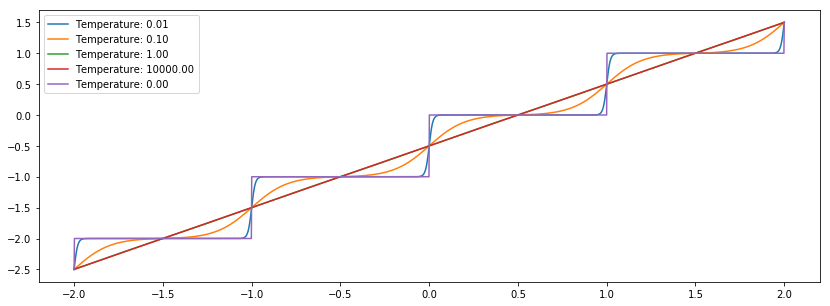

In [159]:
# Plot

x = np.linspace(-2, 2, 2000)[..., np.newaxis]
_plot(5,softfloor,['temperature'],x)

In [163]:
# Gumbel bijector using broadcasting
#Gumbel calcula Y = g(X) = exp(-exp(-(X - loc) / scale)) loc y scale son parametros que recibe
exp=tfb.GumbelCDF(loc=[0.5,1,1.5,2,3],scale=[1,2,2,3,4])

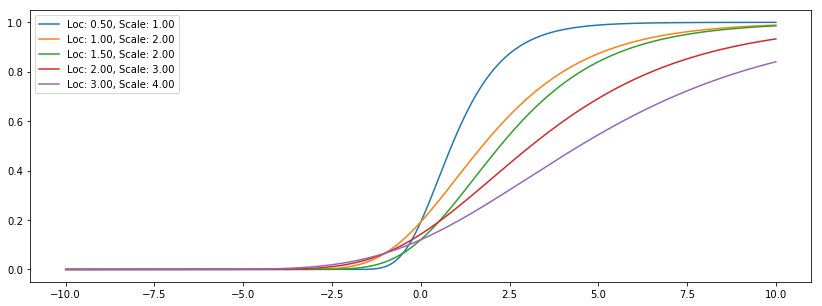

In [164]:
# Plot

x = np.linspace(-10, 10, 2000, dtype=np.float32)[..., np.newaxis]
_plot(5,exp,['loc','scale'],x)

***
<a id="coding_tutorial_2"></a>
## The TransformedDistribution class

Es una clase contenida en tfp.distributions, son distribuciones que podemos creas a partir de una distribucion base mediante un objeto biyector 

In [ ]:
#recuerde que estos do calculos nos dan lo mismo

#esta deoende solamnete de a variable original y la funcion que transforma la distribucion
log_prob_x=normal.log_prob(z)-scale_and_shift.forward_log_det_jacobian(z,event_ndims=0)

#esta depende de la variable tranformada y la inversa de la funcion que transforma la distribucion
#normalmente simpre ocupamos esta para hacer el calculo pues normalmente son los datos que tenemos:
log_prob_x=(normal.log_prob(scale_and_shift.inverse(x))+scale_and_shift.inverse_log_det_jacobian(x,event_ndims=0))

Un $\textbf{Flujo normalizador (Normalizer flow)}$ es un modelo generativo de los datos, el modelo asume lo siguiente:

Tenemos una variable aleatoria inicial que se distribuye de acuerdo a una distribucion base que normalmente es simple o conocida como una gaussiana diagonal:

$$z~D_b \text{  Distribucion base}$$

Asumimos que el proceso generador de datos primero toma un muestro de $z$'s de esta distribución y las transforma de alguna manera, de acuerdo a una funcion invertible $f$ que produce un muestreo $x$:

$$x=f(z)$$

La funcion $f$ puede estar  parametrizada y podemos aprender los mejores parametros maximizando de negativeloglikelihood , esto significa que en el proceso de entrenamiento tendremos datos x de un muestreo y queremos calcular la log_prob  de $x$ bajo el modelo:

$$x~D_t \text{  Distribucion descrita por los datos x}$$

Esto es lo que calcula exactamente:

In [ ]:
log_prob_x=(normal.log_prob(scale_and_shift.inverse(x))+scale_and_shift.inverse_log_det_jacobian(x,event_ndims=0))
#por eso es que ocupamos esta formula para los calculos y es esta la funcion que queremos maximizar durante el
#entrenamiento, el biyector contiene los parametros que queremos optimizar 


#ya que el modelo se entreno podemos tomar un muestreo del modelo primero tomando un muestreo de la distribucion 
#base y despues pasando esta muestra por la transformacion del biyector 
x_sample=bijector.forward(base_dist.sample())

In [170]:
#Entonces:

#tenemos distribucion base (z~D_b)
normal=tfd.Normal(loc=0,scale=1)
#tomamos muestreo de la distribucion base
z=normal.sample(3)#tomamos 3 elementos

#La transformacion la haremos mediante el biyector exponencial f(z)=e^z=x
exp=tfb.Exp()
x=exp.forward(z) #tenemos muestreo de datos x

#el objeto de distribucion tranformada se ocupa directamente  para obtener la distribucion (x~D_t), solo
#debemos pasarle la distribucion base y el biyector usado para tranformar 

dist_t=tfd.TransformedDistribution(normal,exp) #tiene mismos metodos y propiedades que una distribucion 
#tiene event_shepe , batch_shape , metodo .sample .log_prob etc

#podemos generar distribuciones transformadas sin instancial el objeto TransformedDistribution
#podemos simplemente al mismo biyector usado pasarle la distribucion base de esta forma equivalente mente tenemos:
dist_t=exp(normal)

dist_t.log_prob(x)
dist_t.sample()


In [193]:
#el objeto TransformedDistribution tiene parametros para event_shape y batch_shape se ocupan 
#para sobreescribir event_shape/normal_shape de la distribucion base siempre que la distibucion base tenga:
#event_shape=[] y batch_shape=[] por lo contrario no sobreescribe o error

normal=tfd.Normal(loc=0,scale=1)
#note que batch_shape=[], event_shape=[]
print(normal)
print()

#si usamos un biyector que escala (multiplica el vector por matriz triangular inferior)
scale_tril=[[1.,0.],[1.,1.]] #matriz triangular inferior (2x2) por la que multiplicaremos
#definiendo biyector
scale=tfb.ScaleMatvecTriL(scale_tril=scale_tril)

#creemos el objeto de distribucion transformada
#le pasamos event_shape=[2] esto esta bien pues event_shape=[] en la distribucion base
#esta nueva distribuciion tranformada tiene batch_shape=[], event_shape=[2]
#genera 2 distribuciones normalesindependientes de 2 varianbles y escala las variables 2 dimensionales 
#por una matriz triangula inferior 
mvn=tfd.TransformedDistribution(normal,scale,event_shape=[2])

#si hicera:
scale_tril=[[[1.,0.],[1.,1.]],[[0.5,0],[-1,0.5]]]  #tiene forma(2,2,2)ahora multiplicamos por 2 matrices de (2x2)
scale=tfb.ScaleMatvecTriL(scale_tril=scale_tril)
#batch_shape=[2],event_shape=[2] dicatan como manjear esas dimensiones 
mvn=tfd.TransformedDistribution(normal,scale,batch_shape=[2],event_shape=[2])
#lo cual se puede pues batch_shape=[] en la distribucion base 

#note que esto ultimo es equivalente a crear 
mvn2=tfd.MultivariateNormalTriL(loc=0,scale_tril=scale_tril)

tfp.distributions.Normal("Normal", batch_shape=[], event_shape=[], dtype=float32)



### TransformedDistribution

In [194]:
# Parameters

n = 10000
loc = 0
scale = 0.5

In [195]:
# Normal distribution

normal = tfd.Normal(loc=loc, scale=scale)

In [196]:
# Display event and batch shape
#son vacios asi que podemos sobreescribirlos
print('batch shape: ', normal.batch_shape)
print('event shape: ', normal.event_shape)

batch shape:  ()
event shape:  ()


In [197]:
# Exponential bijector
exp=tfb.Exp()

In [200]:
# Log normal transformed distribution using exp and normal bijectors
log_normal_td=exp(normal)

In [203]:
# Display event and batch shape

#son vacios asi que podemos sobreescribirlos
print('batch shape: ', log_normal_td.batch_shape)
print('event shape: ', log_normal_td.event_shape)

batch shape:  ()
event shape:  ()


In [204]:
# Base distribution
z=normal.sample(n)

#### Plots

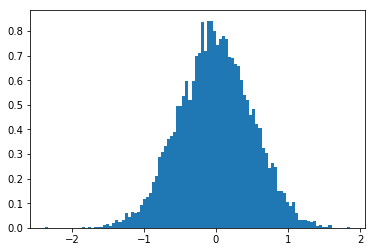

In [205]:
# Plot z density
plt.hist(z,bins=100,density=True)
plt.show()

In [207]:
# Transformed distribution
x=log_normal_td.sample(n)

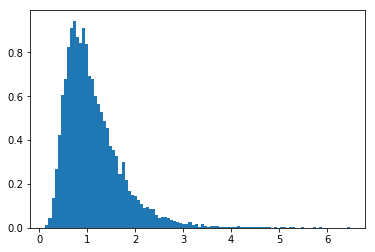

In [208]:
# Plot x density
plt.hist(x,bins=100,density=True)
plt.show()

In [209]:
# Define log normal distribution given by tf

log_normal=tfd.LogNormal(loc=loc,scale=scale)


In [210]:
# Sample log_normal
l=log_normal.sample(n)

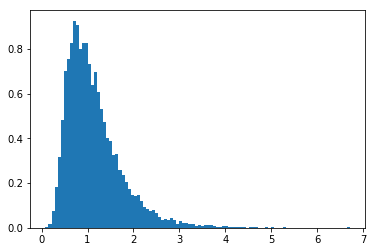

In [211]:
# Plot l density
#grafiquemos pra comparar con la resultante de la tranformacion
plt.hist(l,bins=100,density=True)
plt.show()

#### Log probability

In [212]:
# Log prob of LogNormal
log_prob=log_normal.log_prob(x)

In [213]:
# Log prob of log normal transformed distribution
log_prob_td=log_normal_td.log_prob(x)

In [216]:
# Check log probs
print(log_prob)
print()
print(log_prob_td)
print()

#son muy similares pero no iguales veamos la norma de la difrencia
#es muy pequeña pero no 0 
print(tf.norm(log_prob-log_prob_td))

tf.Tensor(
[-0.63871276 -2.3102567  -0.1074003  ... -0.71105313 -0.186901
 -0.10240442], shape=(10000,), dtype=float32)

tf.Tensor(
[-0.63871276 -2.3102567  -0.10740027 ... -0.7110529  -0.186901
 -0.10240442], shape=(10000,), dtype=float32)

tf.Tensor(7.023191e-06, shape=(), dtype=float32)


### Event shape and batch shape

In [218]:
# Set a scaling lower triangular matrix

#2 matrices generada aleatoriamente de 4x4
tril=tf.random.normal((2,4,4))
#la hacemos triangular inferior
scale_low_tril=tf.linalg.LinearOperatorLowerTriangular(tril)


In [223]:
# View of scale_low_tri
scale_low_tril
#para que muestre valores
scale_low_tril.to_dense()

<tf.Tensor: shape=(2, 4, 4), dtype=float32, numpy=
array([[[-1.1210144e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
        [-6.5495270e-01,  8.4916377e-01,  0.0000000e+00,  0.0000000e+00],
        [-6.0004818e-01, -5.7651085e-01, -7.9634398e-01,  0.0000000e+00],
        [-5.4170775e-01,  3.4379360e-01,  1.1639301e+00, -5.7711749e-04]],

       [[ 2.2579522e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
        [-1.0192660e+00,  8.1501013e-01,  0.0000000e+00,  0.0000000e+00],
        [ 5.5955894e-02, -1.2539417e-01, -5.8366281e-01,  0.0000000e+00],
        [ 2.3520014e-01, -6.2590623e-01, -2.8819528e+00,  2.3980000e+00]]],
      dtype=float32)>

In [224]:
# Define scale linear operator
scale_lin_op=tfb.ScaleMatvecLinearOperator(scale_low_tril)


In [225]:
# Define scale linear operator transformed distribution with a batch and event shape
mvn=tfd.TransformedDistribution(normal,scale_lin_op,batch_shape=[2],event_shape=[4])
print(mvn)

tfp.distributions.TransformedDistribution("scale_matvec_linear_operatorNormal", batch_shape=[2], event_shape=[4], dtype=float32)


In [226]:
# Display event and batch shape

print('batch shape: ', mvn.batch_shape)
print('event shape: ', mvn.event_shape)

batch shape:  (2,)
event shape:  (4,)


In [235]:
# Sample

#si solo muestreo n=10000
#obtengo 10000 muestras de 2x4
y1=mvn.sample(n)
print(y1.shape)

#y1=mvn.sample(sampleshape=(n,))
#print(y1.shape)


(10000, 2, 4)


In [236]:
# Define a MultivariateNormalLinearOperator distribution given by tf
mvn2=tfd.MultivariateNormalLinearOperator(loc=0,scale=scale_low_tril)
print(mvn)

tfp.distributions.TransformedDistribution("scale_matvec_linear_operatorNormal", batch_shape=[2], event_shape=[4], dtype=float32)


In [238]:
# Display event and batch shape
print('batch shape: ', mvn2.batch_shape)
print('event shape: ', mvn2.event_shape)



batch shape:  (2,)
event shape:  (4,)


In [239]:
# Sample
y1=mvn.sample(n)
print(y1.shape)

(10000, 2, 4)


In [245]:
# Check

#si sampleamos normal no obtenemos la forma deseada tenemos (10000,)
xn=normal.sample(n)
print(xn)
print()

#si pasamos forma explicita ya tenemos (10000,2,4)
xn=normal.sample(sample_shape=(n,2,4))
print(xn)
print()

#veamos si coinciden las dos definiciones, da 0 por ende coinciden son iguales
print(tf.norm(mvn.log_prob(xn)-mvn2.log_prob(xn)))

tf.Tensor(
[-0.14578071  0.325578   -0.30295977 ... -0.4263537  -0.10701615
  0.02419007], shape=(10000,), dtype=float32)

tf.Tensor(
[[[ 0.02082675  0.06920729 -0.11171366 -0.5142184 ]
  [ 0.34753874  0.3959267   0.26467228  1.0497628 ]]

 [[-0.21121253 -0.13068765 -0.08510627  0.6582793 ]
  [ 0.7201736  -0.23620872  0.06634848  0.12964618]]

 [[-0.41777042  0.08079476  0.695002   -0.44508493]
  [-0.38670486 -0.24559288  0.19946685 -0.19268231]]

 ...

 [[ 0.38256523 -0.2750348  -0.21682109  0.12966883]
  [ 1.1022358   0.42926255 -0.87235993  0.10767547]]

 [[ 0.45249265  0.9154827   0.20471647  0.43712038]
  [ 0.10297846  0.2915167   0.73302597  0.37154818]]

 [[ 0.4263928   0.17636701 -0.86559904  0.58223325]
  [-0.5668149   0.44740802  0.6656928   0.32088163]]], shape=(10000, 2, 4), dtype=float32)

tf.Tensor(1170800300.0, shape=(), dtype=float32)


***
<a id="coding_tutorial_3"></a>
## Subclassing bijectors

Los biyectores ya tienen muchas funciones invertibles por default pero si quieres definir tu biyector con una funcion invertible propia solo tienes que hacer una subclase que herede estructura de biyector donde definas tu funcion.

In [ ]:
#definimos clase heredando estructura de biyector
class MiBiyector(tfb.Bijector):
    #Inicializador que sobreescribiremos
    #validate_args puede usarse para validar que los parametros pasados a los metodos de la clase son 
    #correctos
    def __init__(self,validate_args=False,name='nombre_biyector'):
        #pasamos argumentos al inicializador de la clase base
        super(MiBiyector,self).__init__(
            #forward_min_event_ndims=0 cuando creas biyector es necesario definir el numero minimo de dimensiones
            #que el biyector necesitapara actuar en ellas como pusimos 0 nuestro biyector puede operar en escalares
            #tambien existe inverse_min_event_ndims normalmnete ambos son iguales y por eso solo se define uno
            #pero si necesitas modificar el otro existe el parametro por si tu biyector cambia la dimension de la 
            #entrada
            #is_constant_jacobian se usa para biyectores donde el jacobiano es constante 
            #ie independiente de las entradas 
            validate_args=validate_args,forward_min_event_ndims=0,name=name,is_constant_jacobian=True
        )
        
    #definimos la funcion que se ejecuta fordward y la inversa inverse
    
    def _forward(self,x):
        return f(x) # aqui defines tu funcion
    
    def _inverse(self,y):
        return f⁻¹(y) # aqui defines la funcion inversa de tu funcion 
    
    #tambien definimos el calculo del log del determinante del jacobiano en ambos casos
    #note que aqui solo manejamos una dimencion si manejamos mas de 1 dimension en forward_min_event_ndims o
    #inverse_min_event_ndims necesitamos reducir el jacobiano sobre esa dimension pero NO debemos preocuparnos de 
    #eso pues este comportamiento se hereda de la classe biyector original 
    def _forward_log_det_jacobian(self,x):
        return log(|J{f(x)}|) # aqui defines la funcion que describe el log(|J{f(x)}|)
    
    def _inverse_log_det_jacobian(self,x):
        return log(|J{f⁻¹(x)}|) # aqui defines la funcion que describe el log(|J{f⁻¹(x)}|)
    
    #Nota:
    #sabemos que log(|J{f⁻¹(x)}|)=-log(|J{f(x)}|) asi podemos calcular uno en base otro por ejemplo:
    
    #definimos el inverso primero
    def _inverse_log_det_jacobian(self,x):
        return log(|J{f⁻¹(x)}|)# aqui defines la funcion que describe el log(|J{f⁻¹(x)}|)
    
    #definimos el forward   usando el inverso
    def _forward_log_det_jacobian(self,x):
        return -self._inverse_log_det_jacobian(self._forward(x)) # definimos en base al inverso
    
    #tambien podemos definir el fordward primero
    def _forward_log_det_jacobian(self,x):
        return log(|J{f(x)}|) # aqui defines la funcion que describe el log(|J{f(x)}|)
    
    def _inverse_log_det_jacobian(self,x):
        return -self._fordwar_log_det_jacobian(self._inverse(y)) # lo calculamos en base del fordward
    
    #por sanidad se define el _inverse_log_det_jacobian y el otro se deriva de este pues el inverse es el que
    #usaremos para los calcilos de loglikelihood
    
    #NOTA solo basta definir uno de los dos y el otro lo infiere solo por la herencia de la clase biyector
    
    #si is_constant_jacobian=True 
    def _forward_log_det_jacobian(self,x):
        return tf.constant(0.,x.dtype) #y asi no hacemos calculos de gratis solo se define y ya
    

In [270]:
# Define a new bijector: Cubic

class Cubic(tfb.Bijector):

    def __init__(self, a, b, validate_args=False, name='Cubic'):
        self.a = tf.cast(a, tf.float32)
        self.b = tf.cast(b, tf.float32)
        if validate_args:
            assert tf.reduce_mean(tf.cast(tf.math.greater_equal(tf.abs(self.a), 1e-5), tf.float32)) == 1.0
            assert tf.reduce_mean(tf.cast(tf.math.greater_equal(tf.abs(self.b), 1e-5), tf.float32)) == 1.0
        super(Cubic, self).__init__(
            validate_args=validate_args, forward_min_event_ndims=0, name=name)
        
    def _forward(self,x):
        x=tf.cast(x,tf.float32)
        return tf.squeeze(tf.pow(self.a*x+self.b,3))
    
    def _inverse(self,y):
        y=tf.cast(y,tf.float32)
        return (tf.math.sign(y)*tf.pow(tf.abs(y),1/3)-self.b)/self.a
    
    #note como solo definimos forward el inverse se infiere por la clase
    def _forward_log_det_jacobian(self,x):
        x=tf.cast(x,tf.float32)
        return tf.math.log(3.*tf.abs(self.a))+2.*tf.math.log(tf.abs(self.a*x+self.b))


In [271]:
# Cubic bijector
cubic=Cubic([1.0,-2.0],[-1.0,0.4],validate_args=True)


In [272]:
# Apply forward transformation
x=tf.constant([[1,2],[3,4]])
y=cubic.forward(x)
print(y)

tf.Tensor(
[[   0.        -46.655994]
 [   8.       -438.97598 ]], shape=(2, 2), dtype=float32)


In [273]:
# Check inverse
#vemos si devueve la inversa correcta si es 0 la calcula bien
np.linalg.norm(x-cubic.inverse(y))


0.0

#### Function plots

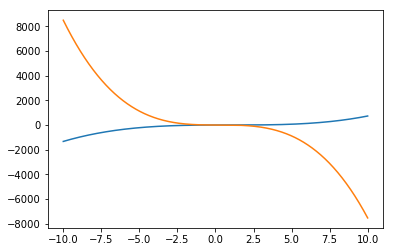

In [274]:
# Plot the forward transformation

x = np.linspace(-10, 10, 500).reshape(-1, 1)
plt.plot(x,cubic.forward(x))

In [275]:
# Display shape
print(cubic.forward(x).shape)

(500, 2)


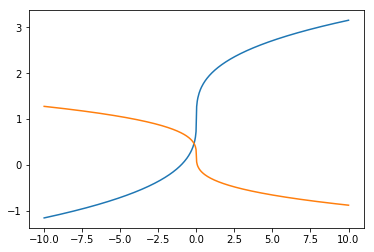

In [276]:
# Plot the inverse
plt.plot(x,cubic.inverse(x))

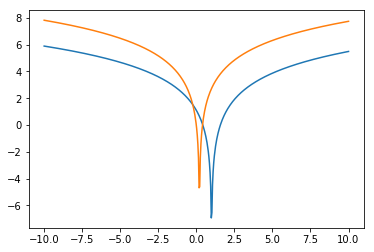

In [277]:
# Plot the forward log Jacobian determinant

plt.plot(x,cubic.forward_log_det_jacobian(x,event_ndims=0))

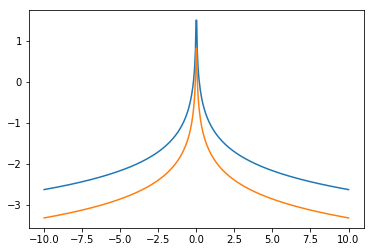

In [278]:
# Plot the inverse log Jacobian determinant
plt.plot(x,cubic.inverse_log_det_jacobian(x,event_ndims=0))

#### TransformedDistribution and plots

In [297]:
# Create a transformed distribution with Cubic
normal=tfd.Normal(loc=0,scale=1)
cubed_normal=tfd.TransformedDistribution(normal,cubic,event_shape=[2])
#note que estoe es equivalente a 
cn=cubic(normal,event_shape=[2])

In [299]:
# Sample cubed_normal
n=1000
g=cubed_normal.sample(n)
print(g.shape)
g1=cn.sample(n)
print(g1.shape)

(1000, 2)
(1000, 2)


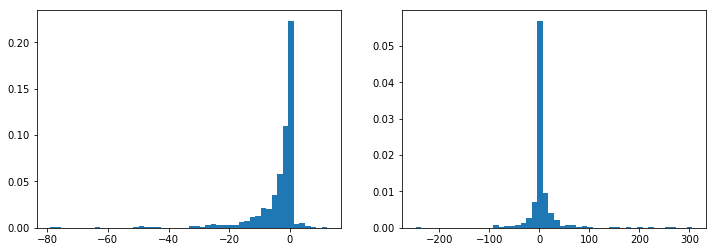

In [294]:
# Plot histograms

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(g[..., 0], bins=50, density=True)
plt.subplot(1, 2, 2)
plt.hist(g[..., 1], bins=50, density=True)
plt.show()

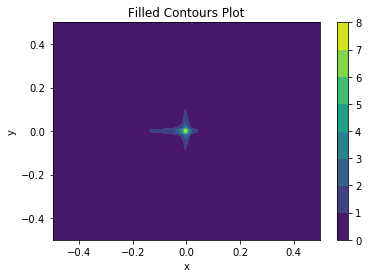

In [295]:
# Make contour plot

xx = np.linspace(-0.5, 0.5, 100)
yy = np.linspace(-0.5, 0.5, 100)
X, Y = np.meshgrid(xx, yy)

fig,ax=plt.subplots(1,1)
Z = cubed_normal.prob(np.dstack((X, Y)))
cp = ax.contourf(X, Y, Z)
fig.colorbar(cp) # Add a colorbar to a plot
ax.set_title('Filled Contours Plot')
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

In [303]:
# Create a transformed distribution with the inverse of Cube given by tf
#recibe un biyector y devuelve biyector que representa la inversa
inverse_cubed=tfb.Invert(cubic)
inv_cubed_normal=inverse_cubed(normal,event_shape=[2])


In [304]:
# Samble inv_cubed_normal
n=1000
g=inv_cubed_normal.sample(n)
print(g.shape)


(1000, 2)


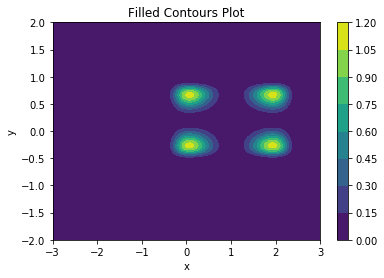

In [305]:
# Make contour plot

xx = np.linspace(-3.0, 3.0, 100)
yy = np.linspace(-2.0, 2.0, 100)
X, Y = np.meshgrid(xx, yy)

fig,ax=plt.subplots(1,1)
Z = inv_cubed_normal.prob(np.dstack((X, Y)))
cp = ax.contourf(X, Y, Z)
fig.colorbar(cp) # Add a colorbar to a plot
ax.set_title('Filled Contours Plot')
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

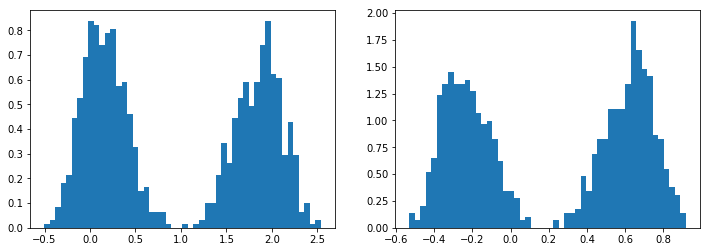

In [306]:
# Plot histograms

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(g[..., 0], bins=50, density=True)
plt.subplot(1, 2, 2)
plt.hist(g[..., 1], bins=50, density=True)
plt.show()

#### Training the bijector

In [308]:
# Create a mixture of four Gaussians
probs=[0.45,0.55]
mix_gauss=tfd.Mixture(
    cat=tfd.Categorical(probs=probs),
    components=[tfd.Normal(loc=2.3,scale=0.4),tfd.Normal(loc=-0.8,scale=0.4)]
)


In [309]:
# Create the dataset

x_train = mix_gauss.sample(10000)
x_train = tf.data.Dataset.from_tensor_slices(x_train)
x_train = x_train.batch(128)

x_valid = mix_gauss.sample(1000)
x_valid = tf.data.Dataset.from_tensor_slices(x_valid)
x_valid = x_valid.batch(128)

print(x_train.element_spec)
print(x_valid.element_spec)

TensorSpec(shape=(None,), dtype=tf.float32, name=None)
TensorSpec(shape=(None,), dtype=tf.float32, name=None)


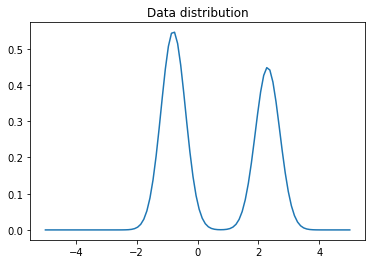

In [322]:
# Plot the data distribution
x=np.linspace(-5.0,5.0,100)
plt.plot(x,mix_gauss.prob(x))
plt.title('Data distribution')
plt.show()

In [323]:
# Make a trainable bijector
trainable_inv_cubic=tfb.Invert(Cubic(tf.Variable(0.25),tf.Variable(-0.1)))
trainable_inv_cubic.trainable_variables

(<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.25>,
 <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=-0.1>)

In [324]:
# Make a trainable transformed distribution
trainable_dist=tfd.TransformedDistribution(normal,trainable_inv_cubic)
trainable_dist.trainable_variables

(<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.25>,
 <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=-0.1>)

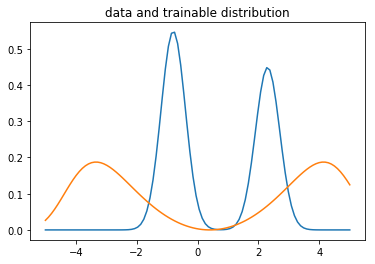

In [325]:
# Plot the data and learned distributions
x=np.linspace(-5.0,5.0,100)
plt.plot(x,mix_gauss.prob(x),label='data')
plt.plot(x,trainable_dist.prob(x),label='trainable')
plt.title('data and trainable distribution')
plt.show()

In [326]:
# Train the bijector

num_epochs = 25
opt = tf.keras.optimizers.Adam()
train_losses = []
valid_losses = []

for epoch in range(num_epochs):
    print("Epoch {}...".format(epoch))
    train_loss = tf.keras.metrics.Mean()
    val_loss = tf.keras.metrics.Mean()
    for train_batch in x_train:
        with tf.GradientTape() as tape:
            tape.watch(trainable_inv_cubic.trainable_variables)
            loss = -trainable_dist.log_prob(train_batch)
        train_loss(loss)
        grads = tape.gradient(loss, trainable_inv_cubic.trainable_variables)
        opt.apply_gradients(zip(grads, trainable_inv_cubic.trainable_variables))
    train_losses.append(train_loss.result().numpy())
        
    # Validation
    for valid_batch in x_valid:
        loss = -trainable_dist.log_prob(valid_batch)
        val_loss(loss)
    valid_losses.append(val_loss.result().numpy())

Epoch 0...
Epoch 1...
Epoch 2...
Epoch 3...
Epoch 4...
Epoch 5...
Epoch 6...
Epoch 7...
Epoch 8...
Epoch 9...
Epoch 10...
Epoch 11...
Epoch 12...
Epoch 13...
Epoch 14...
Epoch 15...
Epoch 16...
Epoch 17...
Epoch 18...
Epoch 19...
Epoch 20...
Epoch 21...
Epoch 22...
Epoch 23...
Epoch 24...


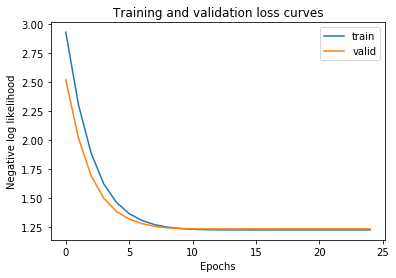

In [327]:
# Plot the learning curves

plt.plot(train_losses, label='train')
plt.plot(valid_losses, label='valid')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Negative log likelihood")
plt.title("Training and validation loss curves")
plt.show()

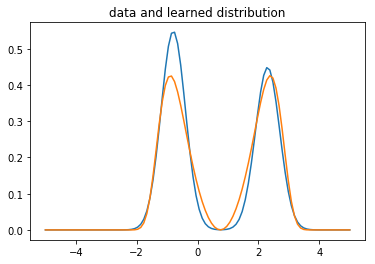

In [328]:
# Plot the data and learned distributions

x=np.linspace(-5.0,5.0,100)
plt.plot(x,mix_gauss.prob(x),label='data')
plt.plot(x,trainable_dist.prob(x),label='learned')
plt.title('data and learned distribution')
plt.show()

In [329]:
# Display trainable variables

trainable_inv_cubic.trainable_variables

(<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.56851375>,
 <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=-0.42500722>)

***
<a id="coding_tutorial_4"></a>
## Normalising flows
Ya vimos que requerimos de funciones invertibles para transformar nuestras distribuciones y así poder modelar distribuciones más complejas, no solo eso tambien requerimos calcular el lofaritmo del determinante del Jacobiano de la transformación, este calculo debe ser eficiente, para modelos largos con muchas capas y transformaciones biyectivas de dimensiones altas este calculo puede ser muy costoso y muy lento para aplicaciones practicas, esta es parte del reto que atacan los $\textbf{Flujos normalizadores}$  estos han llevado all desarrollo de ciertas elecciones de arquitectura y suposiciones sobre los modelos que nos ofrecen una forma eficiente de calcular el determinante del jacobiano veremos 2 implementaciones distintas de flujos normalizadores que nos ofrece el modulo de Biyectores:

# Flujos Autoregresivos (Autroregressive Flows)

Echemos un vistazo a la $\textbf{propiedad autoregresiva}$, supongamos que tenemos un conjunto de  datos:

$\mathcal{D}$ donde para cada $x\in \mathcal{D}$ tenemos que $x\in \mathbb{R}^d$, ie, cada dato es $d$ dimensional,
donde cada entrada del vector representa una caracteristisca de nuestro dato, ie, $x=[x_0,...,x_{d-1}]$, así $x_i=\text{caracteristica}_i$.

En un modelo autoregresivo, expresamos la distribucion conjunta de todas las caracteristicas de los datos como el producto de las distribuciones condicionales donde cada probabilidad condicional de la caracteristica $x_i$ depende solo de las caracteristicas $0,...,i-1$

Por ejemplo:

Supongamos que modelamos la distribucion condicional para cada caracteristica $x[i]$ como una distribución gaussiana, donde la media y la desviacion estandar estan en funcion de las caracteristicas $0,...,i-1$, es decir:
$z\sim N(0,1)$ de tal forma que $x_i=z_i*media(x_0,...,x_{i-1})+desvstan(x_0,...,x_i)$ 
este modelo se denomina $ \textbf{Masked autoregresive flow}$ lo importante es que para este modelo el determinante del Jacobiano es facil de calcular, pues la matriz del Jacobiano es triangular inferior debido a la propiedad autoregresiva.

EL $log(|J\{f(x)\}|)$ de la funcion tranformadora es $\displaystyle -\sum log(desvstan(x_i)$, hay muchas funciones 
que pueden modelar $media$ y $desvstan$ en $media(x_0,...,x_{i-1})+desvstan(x_0,...,x_{i-1})$ 

Una eleccion puede ser implementar una red autoregresiva dada en el modulo de biyectores, asi:

In [334]:
#Red autoregresiva esta clase esta en el modulo biyectores pero no es un biyector pero la usaremos para definir
#un biyector de flujo autoregresivo, en realidad en una implementacion de la arquitectura M.A.D.E 
#(Masked Auto Encoder) para la estimacion distribucional , es una red neuronal allimentada hacia adelante:

made=tfb.AutoregressiveNetwork(
    params=2,#define el tamaño de la dimension extra de la salida del modelo
    event_shape=[3],#determina la forma de la entrada aqui de long 3 y regresa salidas de la misma long con 1
    #dimension extra , que tiene tamaño definido por params en este caso 2
    hidden_units=[16,16],#la definimos con 2 capas ocultas cada una con 16 neuronas 
    activation='sigmoid'#usamos activacion por sigmoide
    )
#por ejemplo si le pasamos una entrada
made(tf.random.normal([2,3])) #tiene forma (2,3) ie lote de 2 vectores de long 3
#el modelo regresara salida de la forma (2,3,2) pues params=2 si params=n arroja salida (2,3,n)
# podemos pensar en esta red como la implementacion de la funcion media() y desvstan() 
#para cada elemento del lote la red arroja 2 parametros (1 para media y uno para desvstan) podemos pensarla como
#una generadora de parametros dependiendo el numero de parametros que necesitemos por dato la red los genera 

#lo importante es que esta red esta diseñada para respeta la propiedad autoregresiva ie cada parametro generado para
#un dato i es calculado usando solo las carcateristicas 0,..i-1, esto lo hace dandole valor 0 a algunos de los pesos
#de la red


#ya podemos definir nuestro (masked autoregresive flow) que describimos:

#queremos usar los parametros dados por la red como media y desvstandar para escalar y desfasar las variables
#aleatorias z[i] del modelo.

#El biyector MaskedAutoregressiveFlow() implementa este comportamiento por nosotros el calculara 
#x[i]=z[i]*scale(x[0],...x[i-1])+loc(x[0],...,x[i-1]) donde scale(x[0],...x[i-1]) y loc(x[0],...,x[i-1]) son los
#valores dados por la red

#solo le pasamos nuestra red mae mediante el parametro shift_and_log_scale_fn  
maf_bijector=tfb.MaskedAutoregressiveFlow(shift_and_log_scale_fn=made)

#demonos una idea de que hace maf_bijector (MaskedAutoregressiveFlow) en su tranformacion forward mediante
#la siguiente descripcion:

#recibe una realizacion del vector aleatorio z
def forward(z):
    #inicializa x en 0 con la misma forma de z
    x=tf.zeros_like(z)
    #itera sobre cada caracteristica ie cada elemento z[i] recuerde 0<i<d-1
    for _ in range(d):
        shift,log_scale=shift_and_log_scale_fn(x)#genera los parametros de acuerdo a la funcion que pasamos en este
        #ejemplo mae que devuelve 2 parametros que se van mejoran pues a cada paso se calculan haciendo uso de mas
        #caracteristicas del vecto recuerda que se calcuan haciendo uso de las caracteristicas anteriores a la actual
        x=z*tf.math.exp(log_scale)+shift# calcula el vector con las caracteristicas corregidas de acuerdo a la
        #distribucion elegida en este caso la gaussiana 
    return x   #regresamos el vector con las caracteristicas mejoradas  

#que hace la inversa de este biyector es mas cencillo:

def inverse(x):
    #obtiene los parametros mediante el made 
    shift,log_scale=shift_and_log_scale_fn(x)
    
    #hace la escala y el desfase inverso
    return (x-shift)/tf.math.exp(log_scale)

#ya que tenemos nuestro biyector de  flujo autoregresivo 

#definimos nuestra distribucion base en este caso una normal
normal=tfd.Normal(loc=0,scale=1)

#generamos nuestra distribucion transformada pasando distribucion base y el biyector
#pasamos event_shape=[3] pues la distribucion base es escalar pero el biyector opera en este event_shape=[3]
maf=tfd.TransformedDistribution(normal,maf_bijector,event_shape=[3])#tiene batch_shape=[] event_shape=[3]

#note que hacer un sample de la distribucion tranformada implica ejecutar el ciclo sobre las caracteristicas
#en el metodo forward del MaskedAutoregressiveFlow, para datos con muchas caracteristicas (d muy grande ) y
#aunado a una red autoregresiva larga esto pueede ser tardado pero en contraste calcular log_prob es rapido 
#Porque para esto usa la tranformacion iversa (formula de cambio de variable) que se calcula en paralelo sobre el 
#vector, se pueden modificar varias cosas del flujo autoregresivo:

#podemos definir una red que no escale los elmentos si no solo que los desplace (solo aplique el shift)

#esto lo podemos hacer con la misma red mae pero al definir el biyector pasamos funcion lambda que para
#el shift le mande los valores del vector y para el scale None lo que implica que el jacobiano es constante
#ahora se calcularia solo x[i]=z[i]+loc(x[0:i-1])

#nota si pasamos los argumentos de log y scale mediante una funcion lambda como aqui el objeto 
#MaskedAutoregressiveFlow no podra guardar la referencia de todas las variables de tf usadas para esa variable
#una solucion facil para esto es referencias las variables definiendolas en  un atributo del  
#MaskedAutoregressiveFlow: maf_bijector._made=made
maf_bijector=tfb.MaskedAutoregressiveFlow(
    lambda y : made(y[...,0],None),is_constant_jacobian=True 
)
maf_bijector._made=made #con esto el biyector llevara seguimiento  de todas las variables usadas por la red MADE

#podemos usar un modelo distinto al MADE para generar parametros por ejemplo usando una capa de keras solo debemos
#asegurarnos que la red o modelo utilizado cumpla la propiedad autoregresiva, esta propiedad no es revisada por 
#el objeto MaskedAutoregressiveFlow asíq ue hay que ser cuidadoso al usar otros modelos.

#tambien debemos notar que hay un flujo imverso autoregresivo que no es otra cosa que se define del flujo 
#autoregresivo en escencia es la inversa del biyector MaskedAutoregressiveFlow por ende podemos 
#generarlo facilmente aplicando el biyector Invert al MaskedAutoregressiveFlow asi:


iaf_bijector=tfb.Invert(tfb.MaskedAutoregressiveFlow(shift_and_log_scale_fn=made))
#recuerda que MaskedAutoregressiveFlow es lento muestreando pero rapido para calcualar log_prob,el inverso es lo
#contrario es rapido muestreando pero muy lento calculando log_prob

# RealNVP

Es otro flujo normalizador, que puede ser implementado.

Es una arquitectura que es un caso especial del flujo normalizador anterior.

De nuevo tenemos datos $\mathcal{D}$ donde cada dato vive en $\mathbb{R}^d$ ie cada vector tiener $d$ caracteristicas, partimos el vector $x$ en dos mediante $d'<d-1$ asi  podemos representar $x=[x_1,...,x_{d'},x_{d'+1},...,x_{d-1}]$ los primeros valores $0,...,d'$ del vector se ocupan para calcular los parametros esto se puede resumir por:

$z\sim N(0,1)$ y $x=[x_0,...,x_{d'},x_{d'+1},...,x_{d-1}]$ asi $x_i=z_i$ para $0<i<d'$ y tenemos
$x_i=z_i*scale(x_0,..,x_{d'})+loc(x_0,..,x_{d'})$ para $d'+1<i<d-1$

Aqui ya no necesitamos cuidar propiedad autoregresiva pero el modelo sigue siendo autoregresivo 

In [12]:
#tenemos opcion especial para ocupar este flujo :
#ya existe una plantilla dentro del modulo de biyectores , tampoco es un biyector es una implementacion de una
#red alimentada hacia enfrente 
#tfb.real_nvp_default_template() que recibe ciertos parametros

nvp=tfb.real_nvp_default_template(
        hidden_layers=[32,32],#numero de capas ocultas 
        activation=tf.nn.relu#esta es la funcion activacion por default si no la cambiamos
 )

#ahora los sifth y scale se producen por esta red hay que tener en cuenta que 
#tiene distinto tamaño de dominio y rango:

t=tf.random.normal([2])# tensor de long 2 ie d'=2

#la funcion toma dos argumentos t que es la entrada de la red  el segundo argumento es el tamaño de la salida ie 1
#lo que indica que el even_size =3 =d
nvp=tfb.real_nvp_default_template(t,1) # arroja tupla de long 2 ([mean],[stdv]) para la particion dada 
#la red se crea desde la primera vez que se llama real_nvp_default_template por ende las demas entradas deben de ser
#de a misma forma que la primera que se le pasa en practica no se ejecuta la funcion como aqui solo la pasmos como
#parametro en shift_and_log_scale_fn para MaskedAutoregressiveFlow

#si definimos el parametro shift_only=True (el default es false) el scalado se fija en 1
#en este caso la funcion sigue arrojando 2 parametros (una tupa de leng 2) pero la segunda entrada es None
#([mean],None) Este modelo con solo shift recibe el nombre de NICE (Non Linear independent components estimator)
#en este caso el jacobiano es la matriz identidad ie la tranformacion preserva volumen 
#Real NVP viene de (real valued non volumen perserving)
nvp=tfb.real_nvp_default_template(t,1,shift_only=True) 

#podemos definir nuestro biyector con esta red usando la clase RealNVP en el modulo de biyectores
#recibe parametros shift_and_log_scale_fn que recibe la funcion con la que generamos parametros en este caso nvp
# y num_masked=2 que hace referencia a d' la que define la particion de x
realnvp_bijector=tfb.RealNVP(num_masked=2,shift_and_log_scale_fn=nvp)

#veamos que hace el forward de este biyector

def forward(z):
    #inicializa vector en 0 de la misma forma que z
    x=tf.zeros_like(z)
    #los primeros d' elementos de z se asignan a x ie se particiona
    x[0:d']=z[0,d']
    #estos primeros d' elemenntos se usan para calcular parametros
    sifht,log_scale=shift_and_log_scale_fn(z[0,d'])
    #calculamos la distribucion gaussiana para los elementos restantes con base de los parametros                                         
    x[d':d]=z[d':d]*tf.math.exp(log_scale)+shift
    return x
                                             
#para la inversa tenemos 
                                             
def inverse(x):
    #inicializa vector en 0 de la misma forma que x
    z=tf.zeros_like(x)
    #los primeros d' elementos de x se asignan a z ie se particiona
    z[0:d']=x[0,d']
    #estos primeros d' elemenntos se usan para calcular parametros
    sifht,log_scale=shift_and_log_scale_fn(x[0,d'])
    #calculamos la distribucion gaussiana para los elementos restantes con base de los parametros                                         
    z[d':d]=(z[d':d]-shift)/tf.math.exp(-log_scale)
    return: z

#este no tiene problemas de computo la inversa y la forward tienen el mismo costo computacional la cuestion es que
#este flujo es menos expresivo que el anterior

#ya que tenemos nuestro biyector podemos usarlo para generar distribucion tranformada                                             
          
#definimos distribucion base                                             
mvn=tfd.MultivariateNormalDiag(loc=[0.,0.,0.])                                             
                                             
#definimos distribucion tranformada                                             

#no definimos event_shape pues las entradas tienen los tamaños adecuados y no necesita especificarse                                             
realnvp=tfd.TransformedDistribution(distribution=mvn,bijector=realnvp_bijector)                                             
                                             
                                             

SyntaxError: invalid syntax (<ipython-input-12-d2a4a7f7940e>, line 41)

In [ ]:
#al crear el bijevtor podemos especificar otros parametros:

#fraction_masked se usa en vez de num_masked=2=d' este parte el vector segun la fraccion dada por ejemplo
#aqui fraction_masked=0.5 lo que indica que la particion del vector la hace por la mitad de su longitud


realnvp_bijector=tfb.RealNVP(shift_and_log_scale_fn=nvp,fraction_masked=0.5)

#como vimos el biyector realnvp deja deja una parte del vector de entrada sin cambio (la que no usa para claculo)
#en la practica combinamos varios biyevtores realnvp juntos que produce un biyector que tranforma todo los
#componentes del vector de entrada por ejemplo:

#usamos biyector de permutacion para cambiar el orden de las caracteristicas en el vector de entrada
permute=tfb.Permute(permutation=[1,2,0])

#generamos bijevtor usando 3 biyectores realnvp
realnvp1_bijector=tfb.RealNVP(shift_and_log_scale_fn=nvp,fraction_masked=0.5)
realnvp2_bijector=tfb.RealNVP(shift_and_log_scale_fn=nvp,fraction_masked=0.5)
realnvp3_bijector=tfb.RealNVP(shift_and_log_scale_fn=nvp,fraction_masked=0.5)

#componenmos los biyctores con una permutacion entre cada proyector real nvp distinto 
#así todos los componentes del vector entrada se transforman
chained_bijector=tfb.Chain([realnvp3_bijector,permute,realnvp2_bijector,permute,realnvp1_bijector])

#definimos distribucion base
mvn=tfd.MultivariateNormalDiag(loc=[0.,0.,0.])

#definimos nuestra distribucion tranformada
realnvp=tfd.TransformedDistribution(distribution=mvn,bijector=chained_bijector)

In [3]:
# Load dataset

from sklearn import datasets
from sklearn.preprocessing import StandardScaler
n_samples = 1000
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)
X, y = noisy_moons
X_data = StandardScaler().fit_transform(X)
xlim, ylim = [-2, 2], [-2, 2]

(-2, 2)

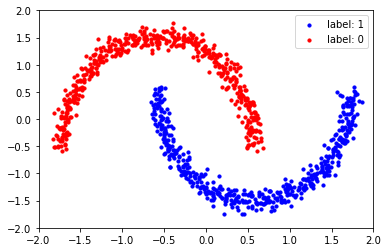

In [4]:
# Plot with labels

y_label = y.astype(np.bool)
X_train, Y_train = X_data[..., 0], X_data[..., 1]
plt.scatter(X_train[y_label], Y_train[y_label], s=10, color='blue')
plt.scatter(X_train[y_label == False], Y_train[y_label == False], s=10, color='red')
plt.legend(['label: 1', 'label: 0'])
plt.xlim(xlim)
plt.ylim(ylim)

In [5]:
# Define base distribution
base_distribution=tfd.Normal(loc=0,scale=1)

In [8]:
# Define the trainable distribution
def make_masked_autoregressive_flow(hidden_units=[16,16],activation='relu'):
    made=tfb.AutoregressiveNetwork(
        params=2,event_shape=[2],hidden_units=hidden_units,activation=activation
    )
    return tfb.MaskedAutoregressiveFlow(shift_and_log_scale_fn=made)

trainable_distribution=tfd.TransformedDistribution(base_distribution,make_masked_autoregressive_flow(),
                                                   event_shape=[2])
    

In [9]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
from tensorflow.compat.v1 import logging
logging.set_verbosity(logging.ERROR)

In [10]:
# Define a plot contour routine

def plot_contour_prob(dist, rows=1, title=[''], scale_fig=4):
    cols = int(len(dist) / rows)
    xx = np.linspace(-5.0, 5.0, 100)
    yy = np.linspace(-5.0, 5.0, 100)
    X, Y = np.meshgrid(xx, yy)

    fig, ax = plt.subplots(rows, cols, figsize=(scale_fig * cols, scale_fig * rows))
    fig.tight_layout(pad=4.5)

    i = 0
    for r in range(rows):
        for c in range(cols):
            Z = dist[i].prob(np.dstack((X, Y)))
            if len(dist) == 1:
                axi = ax
            elif rows == 1:
                axi = ax[c]
            else:
                axi = ax[r, c]

            # Plot contour
            p = axi.contourf(X, Y, Z)

            # Add a colorbar
            divider = make_axes_locatable(axi)
            cax = divider.append_axes("right", size="5%", pad=0.1)
            cbar = fig.colorbar(p, cax=cax)

            # Set title and labels
            axi.set_title('Filled Contours Plot: ' + str(title[i]))
            axi.set_xlabel('x')
            axi.set_ylabel('y')

            i += 1
    plt.show()

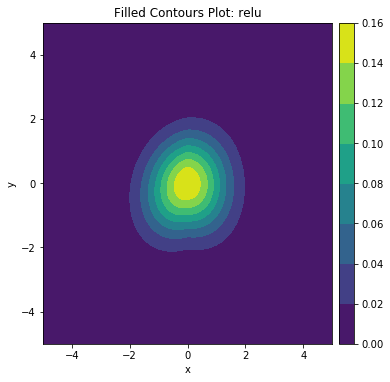

In [14]:
# Plot contour
activation='relu'

maf=tfd.TransformedDistribution(base_distribution,make_masked_autoregressive_flow(activation=activation),
                                event_shape=[2])

plot_contour_prob([maf],scale_fig=6,title=[activation])


In [15]:
from tensorflow.keras.layers import Input
from tensorflow.keras import Model

In [23]:
# Make samples
x=base_distribution.sample((1000,2))
names=[base_distribution.name,trainable_distribution.bijector.name]
samples=[x,trainable_distribution.bijector.forward(x)]

In [24]:
# Define a scatter plot routine for the bijectors

def _plot(results, rows=1, legend=False):
    cols = int(len(results) / rows)
    f, arr = plt.subplots(rows, cols, figsize=(4 * cols, 4 * rows))
    i = 0
    for r in range(rows):
        for c in range(cols):
            res = results[i]
            X, Y = res[..., 0].numpy(), res[..., 1].numpy()
            if rows == 1:
                p = arr[c]
            else:
                p = arr[r, c]
            p.scatter(X, Y, s=10, color='red')
            p.set_xlim([-5, 5])
            p.set_ylim([-5, 5])
            p.set_title(names[i])
            
            i += 1

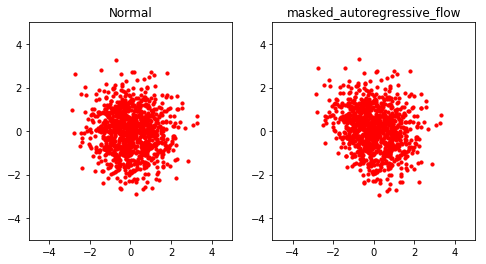

In [25]:
# Plot

_plot(samples)

#### Training a MaskedAutoregressiveFlow bijector

In [26]:
from tensorflow.keras.callbacks import LambdaCallback

In [27]:
# Define a training routine

def train_dist_routine(trainable_distribution, n_epochs=200, batch_size=None, n_disp=100):
    x_ = Input(shape=(2,), dtype=tf.float32)
    log_prob_ = trainable_distribution.log_prob(x_)
    model = Model(x_, log_prob_)

    model.compile(optimizer=tf.optimizers.Adam(),
                  loss=lambda _, log_prob: -log_prob)

    ns = X_data.shape[0]
    if batch_size is None:
        batch_size = ns

    # Display the loss every n_disp epoch
    epoch_callback = LambdaCallback(
        on_epoch_end=lambda epoch, logs: 
                        print('\n Epoch {}/{}'.format(epoch+1, n_epochs, logs),
                              '\n\t ' + (': {:.4f}, '.join(logs.keys()) + ': {:.4f}').format(*logs.values()))
                                       if epoch % n_disp == 0 else False 
    )


    history = model.fit(x=X_data,
                        y=np.zeros((ns, 0), dtype=np.float32),
                        batch_size=batch_size,
                        epochs=n_epochs,
                        validation_split=0.2,
                        shuffle=True,
                        verbose=False,
                        callbacks=[epoch_callback])
    return history

In [33]:
# Train the distribution
history=train_dist_routine(trainable_distribution,n_epochs=800,n_disp=50)



 Epoch 1/800 
	 loss: 2.1407, val_loss: 2.1754

 Epoch 51/800 
	 loss: 2.1202, val_loss: 2.1153

 Epoch 101/800 
	 loss: 2.0983, val_loss: 2.0963

 Epoch 151/800 
	 loss: 2.0792, val_loss: 2.0798

 Epoch 201/800 
	 loss: 2.0642, val_loss: 2.0656

 Epoch 251/800 
	 loss: 2.0512, val_loss: 2.0547

 Epoch 301/800 
	 loss: 2.0398, val_loss: 2.0483

 Epoch 351/800 
	 loss: 2.0299, val_loss: 2.0385

 Epoch 401/800 
	 loss: 2.0242, val_loss: 2.0308

 Epoch 451/800 
	 loss: 2.0203, val_loss: 2.0251

 Epoch 501/800 
	 loss: 2.0170, val_loss: 2.0186

 Epoch 551/800 
	 loss: 2.0136, val_loss: 2.0112

 Epoch 601/800 
	 loss: 2.0105, val_loss: 2.0076

 Epoch 651/800 
	 loss: 2.0070, val_loss: 2.0045

 Epoch 701/800 
	 loss: 2.0042, val_loss: 2.0017

 Epoch 751/800 
	 loss: 2.0014, val_loss: 1.9983


In [34]:
# Get losses

train_losses = history.history['loss']
valid_losses = history.history['val_loss']

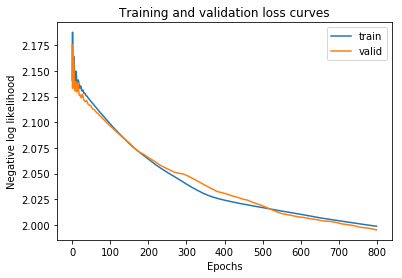

In [35]:
# Plot loss vs epoch

plt.plot(train_losses, label='train')
plt.plot(valid_losses, label='valid')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Negative log likelihood")
plt.title("Training and validation loss curves")
plt.show()

In [36]:
# Make samples

x=base_distribution.sample((1000,2))
names=[base_distribution.name,trainable_distribution.bijector.name]
samples=[x,trainable_distribution.bijector.forward(x)]

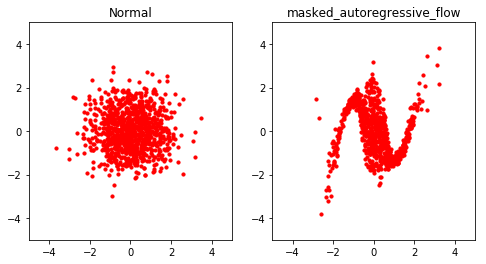

In [37]:
# Plot

_plot(samples)

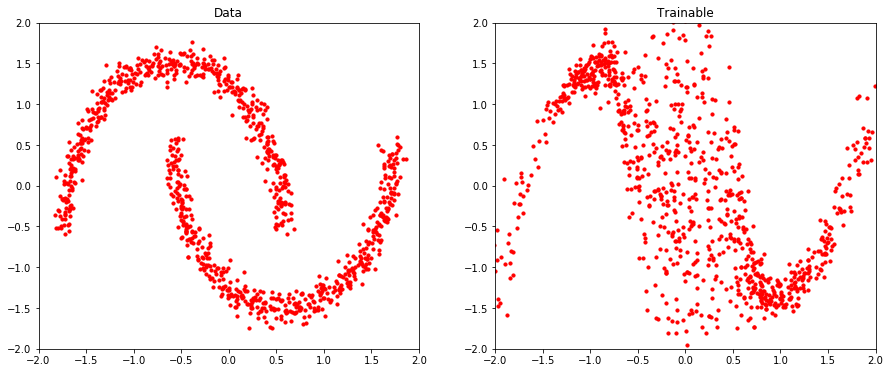

In [38]:
# Define a plot routine

def visualize_training_data(samples):
    f, arr = plt.subplots(1, 2, figsize=(15, 6))
    names = ['Data', 'Trainable']
    samples = [tf.constant(X_data), samples[-1]]

    for i in range(2):
        res = samples[i]
        X, Y = res[..., 0].numpy(), res[..., 1].numpy()
        arr[i].scatter(X, Y, s=10, color='red')
        arr[i].set_xlim([-2, 2])
        arr[i].set_ylim([-2, 2])
        arr[i].set_title(names[i])

visualize_training_data(samples)

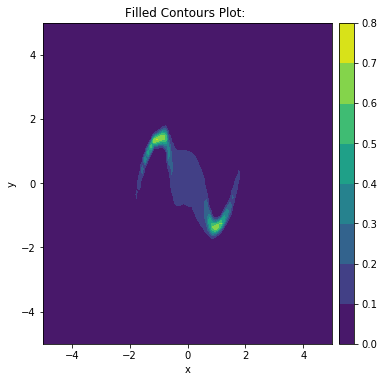

In [39]:
# Plot contour
plot_contour_prob([trainable_distribution],scale_fig=6)


#### Training a chain of MaskedAutoregressiveFlow bijectors

In [50]:
# Define a more expressive model

num_bijectors=6
bijectors=[]

for i in range(num_bijectors):
    masked_auto_i=make_masked_autoregressive_flow(hidden_units=[256,256],activation='relu')
    bijectors.append(masked_auto_i)
    bijectors.append(tfb.Permute(permutation=[1,0]))

flow_bijector=tfb.Chain(list(reversed(bijectors[:-1])))    

In [51]:
# Define the trainable distribution

trainable_distribution=tfd.TransformedDistribution(distribution=base_distribution,bijector=flow_bijector,
                                                 event_shape=[2])

In [52]:
# Make samples

def make_samples():
    x = base_distribution.sample((1000, 2))
    samples = [x]
    names = [base_distribution.name]
    for bijector in reversed(trainable_distribution.bijector.bijectors):
        x = bijector.forward(x)
        samples.append(x)
        names.append(bijector.name)
    return names, samples

names, samples = make_samples()

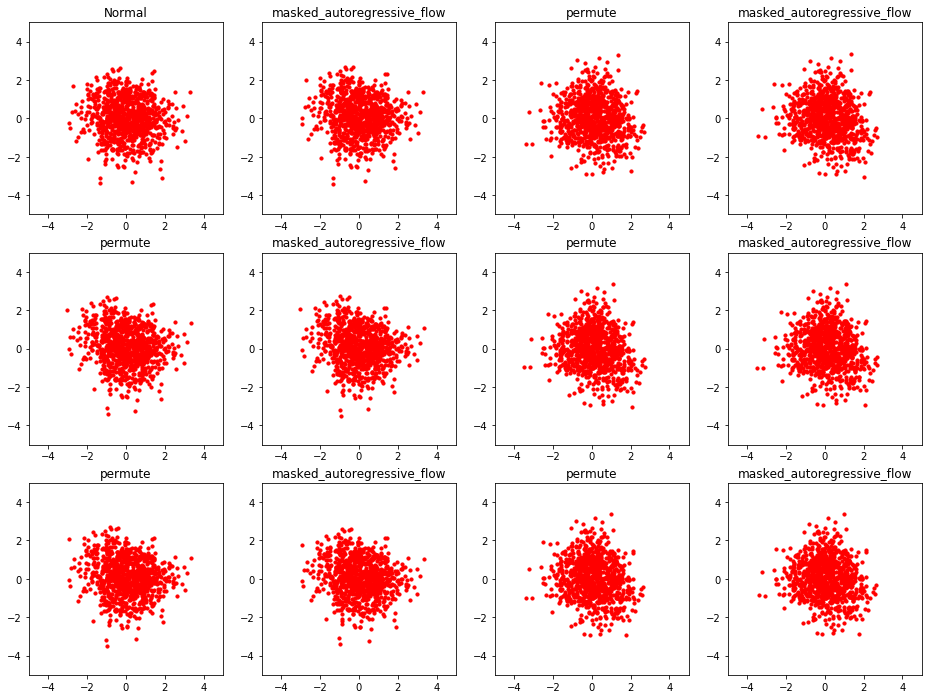

In [53]:
# Plot
_plot(samples,3)


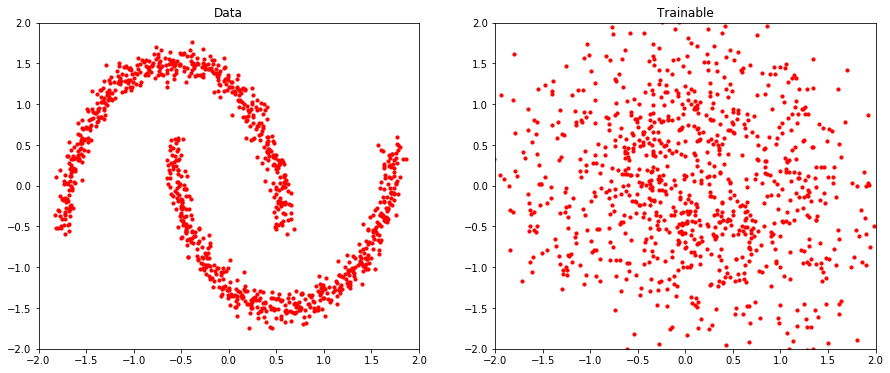

In [54]:
# Plot
visualize_training_data(samples)

In [55]:
# Train the distribution

history=train_dist_routine(trainable_distribution,n_epochs=600,n_disp=50)


 Epoch 1/600 
	 loss: 2.8141, val_loss: 2.6866

 Epoch 51/600 
	 loss: 2.0708, val_loss: 2.0954

 Epoch 101/600 
	 loss: 1.9629, val_loss: 1.9520

 Epoch 151/600 
	 loss: 2.2369, val_loss: 2.2429

 Epoch 201/600 
	 loss: 3.8286, val_loss: 3.8625

 Epoch 251/600 
	 loss: 2.1555, val_loss: 2.1070

 Epoch 301/600 
	 loss: 1.8827, val_loss: 1.8214

 Epoch 351/600 
	 loss: 1.8061, val_loss: 1.7537

 Epoch 401/600 
	 loss: 2.9851, val_loss: 2.9508

 Epoch 451/600 
	 loss: 1.8840, val_loss: 1.8882

 Epoch 501/600 
	 loss: 1.6964, val_loss: 1.7478

 Epoch 551/600 
	 loss: 1.5405, val_loss: 1.5035


In [56]:
# Get losses

train_losses = history.history['loss']
valid_losses = history.history['val_loss']

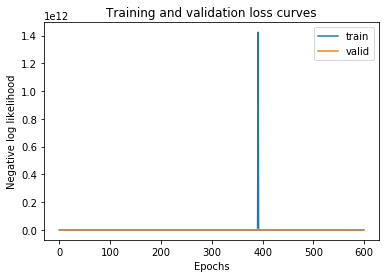

In [57]:
# Plot loss vs epoch

plt.plot(train_losses, label='train')
plt.plot(valid_losses, label='valid')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Negative log likelihood")
plt.title("Training and validation loss curves")
plt.show()

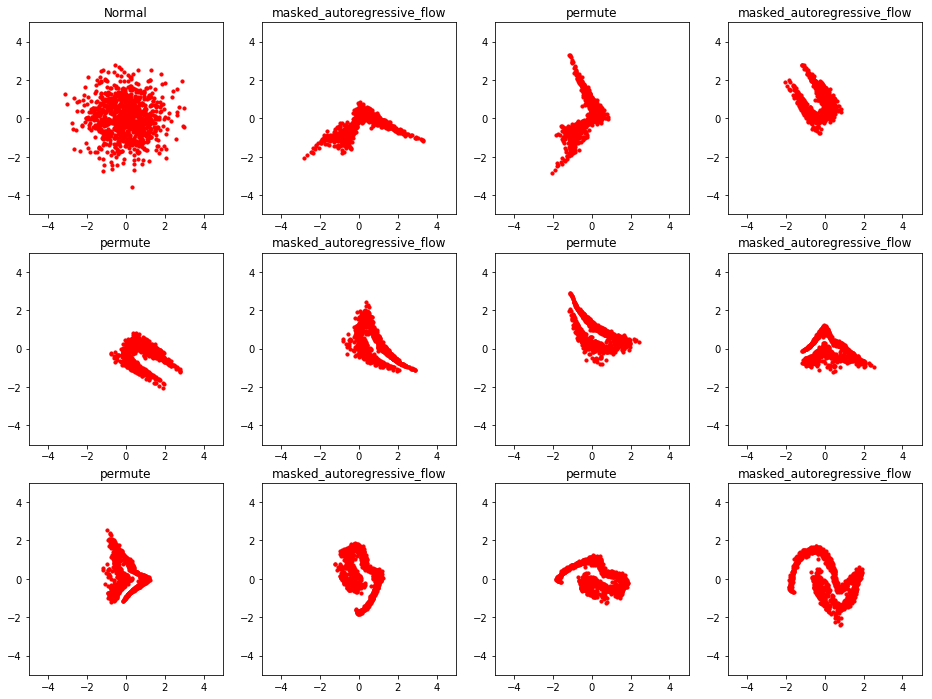

In [58]:
# Make samples and plot

names,samples=make_samples()
_plot(samples,3)

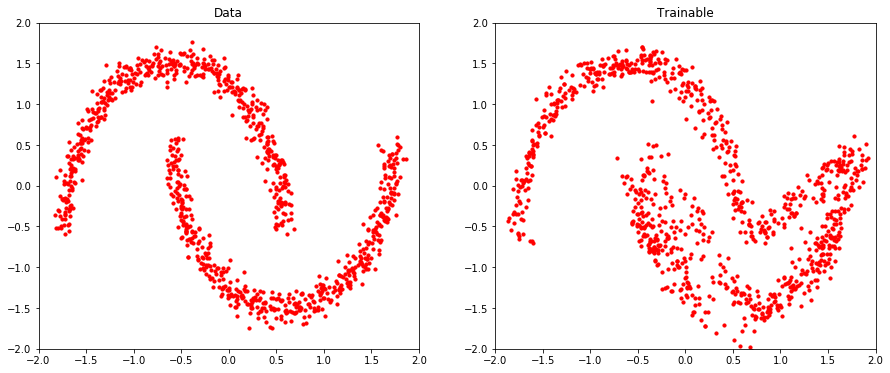

In [59]:
# Plot

visualize_training_data(samples)

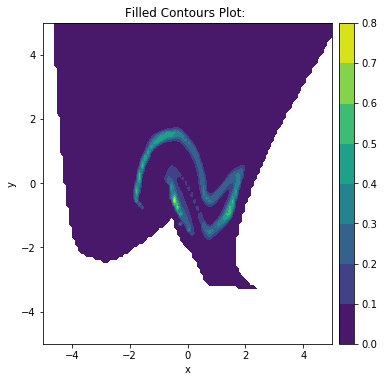

In [60]:
# Plot

plot_contour_prob([trainable_distribution],scale_fig=6)